### The Japanese Automotive Trade in 2015

Japan is the world’s third largest economy and one of the biggest export oriented countries. Automobiles are probably Japan’s most famous export, next to electronics. The auto industry is critically important for Japan, both domestically and overseas. But who does it export to? How much is its trade value? What is the trade balance? Does it import at all? Let’s take a look.

This article will examine the trade flows of finished automobiles and intermediate auto parts into and out of the Japan in 2015. The UN publishes trade data for Japan and most other nations on its Comtrade database. This is the source for the data in this article.

In [6]:
import warnings 
warnings.simplefilter('ignore', FutureWarning)

from pandas import*

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
LOCATION = 'Jpn_Auto2015.csv'

In [8]:
auto = read_csv(LOCATION, dtype={'Commodity Code':str})
auto.head()

,Classification,Year,Period,Period Desc.,Aggregate Level,Is Leaf Code,Trade Flow Code,Trade Flow,Reporter Code,Reporter,...,Qty,Alt Qty Unit Code,Alt Qty Unit,Alt Qty,Netweight (kg),Gross weight (kg),Trade Value (US$),CIF Trade Value (US$),FOB Trade Value (US$),Flag
0,H4,2015,2015,2015,4,0,1,Import,392,Japan,...,NaN,NaN,809037959,NaN,809037959,NaN,7206980378,NaN,NaN,0
1,H4,2015,2015,2015,4,0,2,Export,392,Japan,...,NaN,NaN,2562039113,NaN,2562039113,NaN,28616865217,NaN,NaN,0
2,H4,2015,2015,2015,4,0,1,Import,392,Japan,...,NaN,NaN,322735,NaN,675986137,NaN,8984266522,NaN,NaN,4
3,H4,2015,2015,2015,4,0,2,Export,392,Japan,...,NaN,NaN,4966051,NaN,6119871148,NaN,86050945679,NaN,NaN,6
4,H4,2015,2015,2015,4,0,2,Export,392,Japan,...,NaN,NaN,1465,NaN,268543,NaN,2918646,NaN,NaN,4


In [9]:
COLUMNS = ['Year', 'Period', 'Trade Flow', 'Reporter', 'Partner', 'Commodity', 'Commodity Code', 'Trade Value (US$)']
auto = auto[COLUMNS]

In [10]:
auto.head()

,Year,Period,Trade Flow,Reporter,Partner,Commodity,Commodity Code,Trade Value (US$)
0,2015,2015,Import,Japan,World,Vehicles other than railway or tramway rolling...,8708,7206980378
1,2015,2015,Export,Japan,World,Vehicles other than railway or tramway rolling...,8708,28616865217
2,2015,2015,Import,Japan,World,Vehicles other than railway or tramway rolling...,8703,8984266522
3,2015,2015,Export,Japan,World,Vehicles other than railway or tramway rolling...,8703,86050945679
4,2015,2015,Export,Japan,Afghanistan,Vehicles other than railway or tramway rolling...,8703,2918646


In [11]:
def autoType(code):
    if code == '8703':
        return 'Automobile'
    if code == '8708':
        return 'Parts'
    else:
        return 'Unkown'
    

COMMODITY = 'Commodity'
auto[COMMODITY] = auto['Commodity Code'].apply(autoType)
MONTH = 'Period'
PARTNER = 'Partner'
FLOW = 'Trade Flow'
VALUE = 'Trade Value (US$)'
headings = [MONTH, PARTNER, FLOW, COMMODITY, VALUE]
auto = auto[headings]
auto.head(10)


,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
0,2015,World,Import,Parts,7206980378
1,2015,World,Export,Parts,28616865217
2,2015,World,Import,Automobile,8984266522
3,2015,World,Export,Automobile,86050945679
4,2015,Afghanistan,Export,Automobile,2918646
5,2015,Afghanistan,Export,Parts,1895770
6,2015,Albania,Export,Parts,46030
7,2015,Albania,Export,Automobile,15330
8,2015,Algeria,Export,Automobile,9911313
9,2015,Algeria,Export,Parts,2241007


In [12]:
auto_world = auto[auto['Partner']=='World']
auto_countries = auto[auto['Partner'] != 'World']

In [31]:
auto_countries.head()

,Period,Partner,Trade Flow,Commodity,Trade Value (US$)
4,2015,Afghanistan,Export,Automobile,2918646
5,2015,Afghanistan,Export,Parts,1895770
6,2015,Albania,Export,Parts,46030
7,2015,Albania,Export,Automobile,15330
8,2015,Algeria,Export,Automobile,9911313


### Total Auto Trade Flows

To look at the Japanese trade balance, the data is split into two groups: exports from the Japan and imports into the Japan. The values in these groups are added to get the total trade value, and we can use this to investigate trade balances.

In [14]:
#Trade Flow
#'how much does Japan export and import and is the balance positive (more exports than imports)?'
#seperate data into two groups, imports and exports

In [15]:
grouped = auto_countries.groupby([FLOW])
grouped[VALUE].aggregate(sum)

Trade Flow
Export    114667810889
Import     16191246905
Name: Trade Value (US$), dtype: int64

This represents a trade surplus for the Japanese auto industry, with a value of over 98 billion dollars.

### Imports

Which countries does Japan import the most from? 

In [19]:
imports = auto_countries[auto_countries[FLOW] == 'Import']
groupedIm = imports.groupby([PARTNER])
print('Japan imports from', len(groupedIm), 'countries.')
print('The 10 biggest exporters to Japan are:')
totalImports = groupedIm[VALUE].aggregate(sum).sort(inplace=False,ascending=False)
totalImports.head(10)

Japan imports from 78 countries.
The 10 biggest exporters to Japan are:


Partner
Germany           4962954704
China             2693358626
USA               1195633033
Thailand           936944338
United Kingdom     771914374
Rep. of Korea      677171176
South Africa       612379259
Italy              594436123
Hungary            515134506
Viet Nam           388971299
Name: Trade Value (US$), dtype: int64

### Exports

Which countries does Japan export the most to? 

In [20]:
exports = auto_countries[auto_countries[FLOW] == 'Export']
groupedEx = exports.groupby([PARTNER])
print('Japan exports to', len(groupedEx), 'countries.')
print('The 10 Biggest importers from Japan are:')
totalExports = groupedEx[VALUE].aggregate(sum).sort(inplace=False,ascending=False)
totalExports.head(10)

Japan exports to 207 countries.
The 10 Biggest importers from Japan are:


Partner
USA                     42726281624
China                    9396503907
Australia                5145915152
Canada                   4010759674
United Arab Emirates     3755731997
United Kingdom           3320960652
Mexico                   2912091343
Russian Federation       2778105327
Saudi Arabia             2730582674
Thailand                 2655308699
Name: Trade Value (US$), dtype: int64

In [21]:
#groups = auto_countries.groupby('Trade Flow')

In [22]:
#groups.get_group('Import').head()

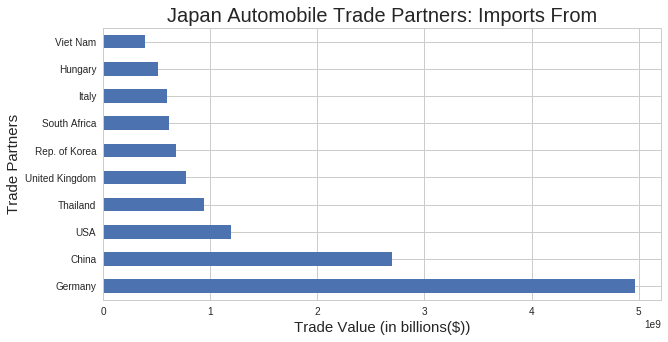

In [23]:
importPlot = totalImports.head(10).plot(kind='barh', figsize=(10,5))
importPlot.set_xlabel('Trade Value (in billions($))', fontsize=15)
importPlot.set_ylabel('Trade Partners', fontsize=15)
importPlot.set_title('Japan Automobile Trade Partners: Imports From', fontsize=20)

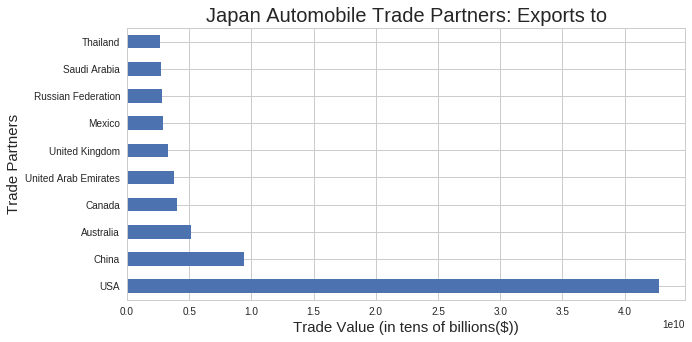

In [24]:
exportPlot = totalExports.head(10).plot(kind='barh', figsize=(10,5))
exportPlot.set_xlabel('Trade Value (in tens of billions($))', fontsize=15)
exportPlot.set_title('Japan Automobile Trade Partners: Exports to', fontsize=20)
exportPlot.set_ylabel('Trade Partners', fontsize=15)

In [25]:
#Bidirectional trade

In [26]:
countries = pivot_table(auto_countries, index=[PARTNER], columns=[FLOW], values=VALUE, aggfunc=sum)
countries.head()

Trade Flow,Export,Import
Partner,,
Afghanistan,4814416.0,NaN
Albania,61360.0,NaN
Algeria,12152320.0,NaN
American Samoa,937485.0,NaN
Andorra,2801.0,NaN


In [27]:
countries = countries.dropna()
countries

Trade Flow,Export,Import
Partner,,
Argentina,1.788073e+08,1.231170e+06
Australia,5.145915e+09,4.533299e+07
Austria,2.579565e+08,1.659996e+08
Belgium,1.319996e+09,2.898036e+08
Brazil,8.330155e+08,9.481767e+06
Bulgaria,2.274989e+06,2.309000e+04
Cambodia,1.546732e+07,4.913030e+05
Canada,4.010760e+09,4.407097e+07
Cayman Isds,6.434044e+06,3.851000e+03


In [28]:
countries.reset_index(drop=True)

Trade Flow,Export,Import
0,1.788073e+08,1.231170e+06
1,5.145915e+09,4.533299e+07
2,2.579565e+08,1.659996e+08
3,1.319996e+09,2.898036e+08
4,8.330155e+08,9.481767e+06
5,2.274989e+06,2.309000e+04
6,1.546732e+07,4.913030e+05
7,4.010760e+09,4.407097e+07
8,6.434044e+06,3.851000e+03
9,6.234615e+08,1.082600e+04


Japan has bidirectional trade with 75 countries 

### Conclusions 

The Japanese automobile trade from January to December 2015 was analysed in terms of which countries Japan  depends on for income (exports) and goods (imports). Over this period, Japan had a trade surplus of over 98 billion US dollars.

The United States is Japan’s largest export market, with a massive trade value of over 42 billion dollars. The US imported 41 billion dollars more in cars and parts from Japan than it exported to it. US exports to Japan were only worth a little over 1 billion dollars. China is a distant second, with an import value of 9 billion, while exporting about 2.7 billion to Japan.

Germany is the largest exporter of cars and parts to Japan, with a trade value of  almost 5 billion dollars. Two other top economies that Japan both imports from and exports to are Thailand and the United Kingdom. Thailand imported 2.7 billion dollars worth of cars and parts while exporting a little more than 900 million. The UK imported 3.3 billion dollars worth while it exported 700 million.

Unsurprisingly, the Japanese automobile industry is extremely lucrative and does business all over the world. The most interesting aspect of this analysis is just how much Japan depends on the US as an export market. The US consumes about 37% of Japanese automobile exports, and is by far the largest customer of Japanese cars.



### Appendix

For this project, the Japanese auto trade data was collected , simplified and renamed. First, it was broken down into two categories, imports and exports.

The imports and exports were compared, and the the top Japanese trade partners were selected and rendered into bar charts. Comparing these countries gave us a better overview of who Japan is trading with, and in what direction that trade is going.

To access this data:

go to https://comtrade.un.org/data/,
select ‘type of product: goods’,
‘frequency: monthly’,
‘periods: January to December 2015’,
‘reporter: Japan’,
‘partners: all’,
‘flows: imports and exports’,
‘HS (as reported) commodity codes: 8703, Motor Vehicles. 8708, Parts and Accessories for Motor Vehicles.’
Select the ‘Download CSV ‘ option to download the data set.
Clicking on ‘Preview’ results in a message that the data exceeds 500 rows.
Data was downloaded using the Download CSV button and the download file renamed appropriately.